In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

 =============================================EDA========================================================

In [2]:
housing = pd.read_csv(r'housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

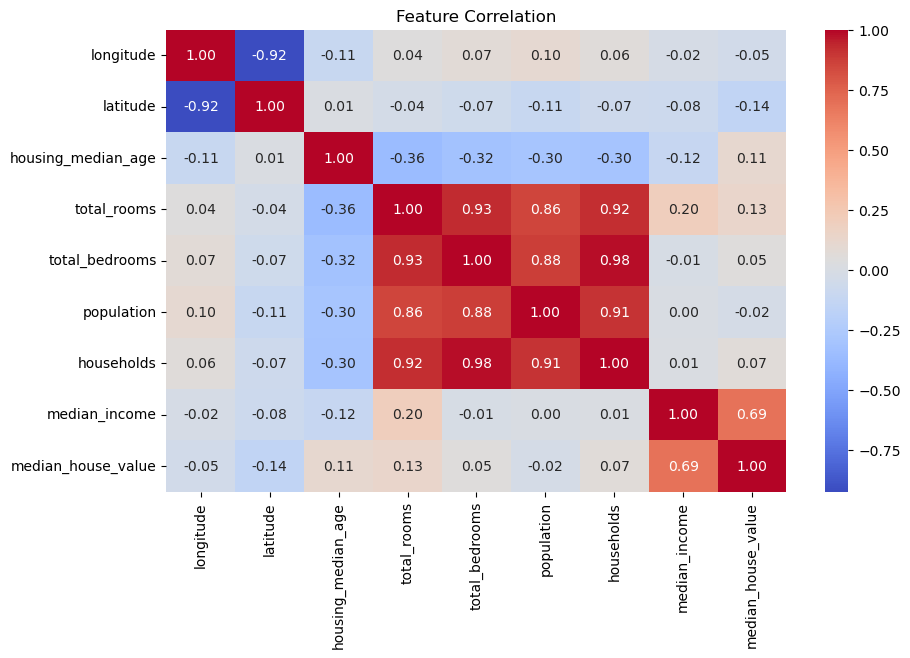

In [6]:
housing_dropped = housing.drop(columns=['ocean_proximity'])
plt.figure(figsize=(10, 6))
sns.heatmap(housing_dropped.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation")
plt.show()


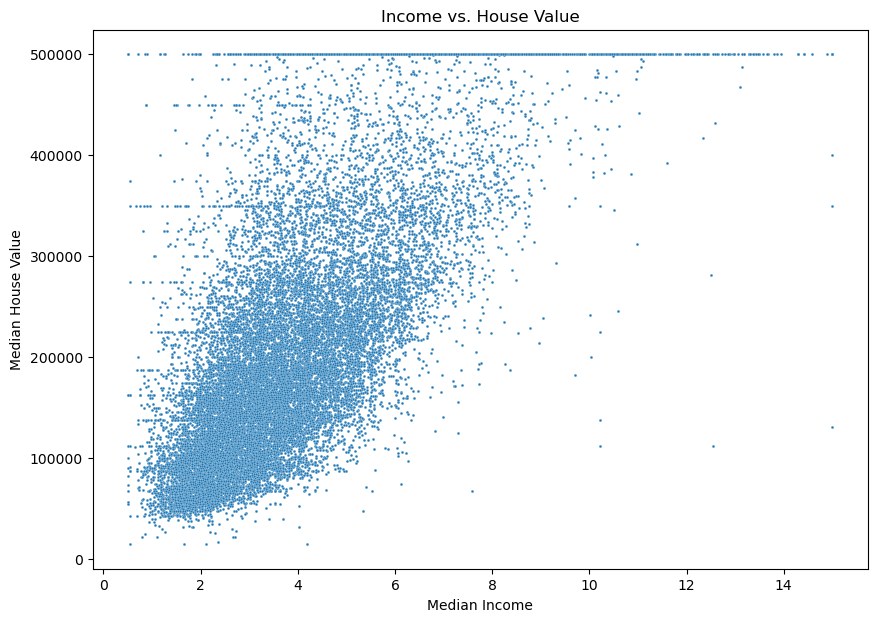

In [7]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=housing_dropped['median_income'], y=housing_dropped['median_house_value'], s=4)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs. House Value")
plt.show()

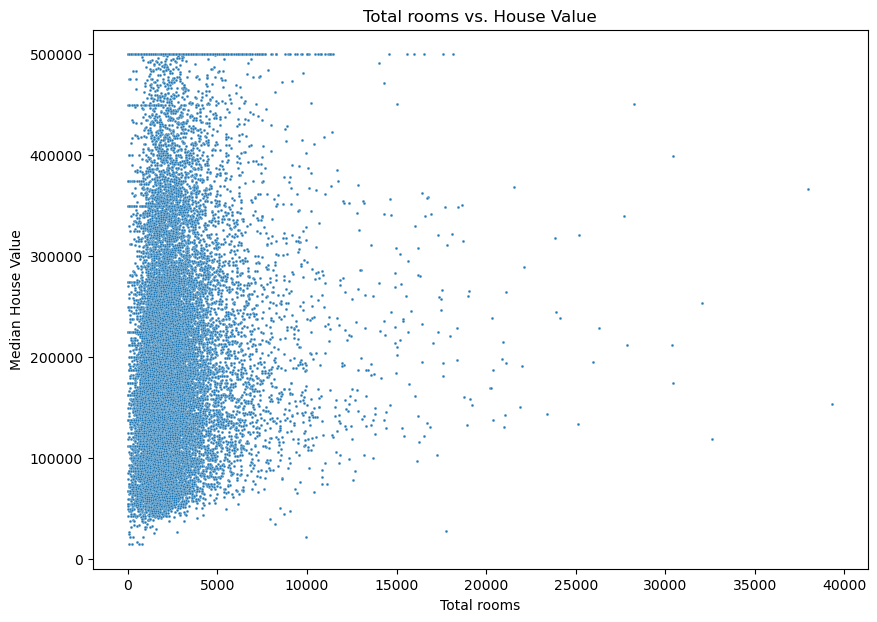

In [8]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=housing_dropped['total_rooms'], y=housing_dropped['median_house_value'], s=4)
plt.xlabel("Total rooms")
plt.ylabel("Median House Value")
plt.title("Total rooms vs. House Value")
plt.show()

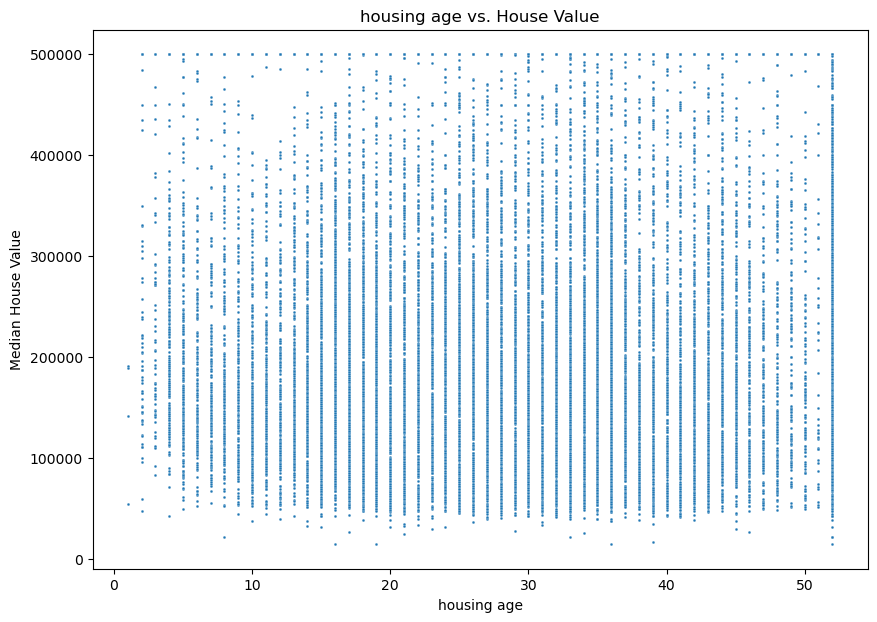

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=housing_dropped['housing_median_age'], y=housing_dropped['median_house_value'], s=4)
plt.xlabel("housing age")
plt.ylabel("Median House Value")
plt.title("housing age vs. House Value")
plt.show()

In [10]:
count_more_500 = ((housing_dropped['median_house_value'] > 499990) & (housing_dropped['median_house_value'] < 500100)).sum()
count_more_500

992

==============================================Splitting data====================================================

In [11]:
X = housing['median_income'].to_numpy().reshape(-1, 1)
y = housing['median_house_value']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

imputer = SimpleImputer(strategy="median")
X_val_filled = imputer.fit_transform(X_val)
X_test_filled = imputer.fit_transform(X_test)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 14448
Validation set size: 3096
Test set size: 3096


==============================================Linear Regression one feature====================================================

In [12]:
lr_model = LinearRegression()
cross_val_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(-cross_val_scores)
mean_cv_rmse = round( np.sqrt(-cross_val_scores.mean()), 2)
print(f"rmse = {mean_cv_rmse}")

[7.33366522e+09 6.73533381e+09 7.16435564e+09 6.83174000e+09
 7.19801276e+09]
rmse = 83979.89


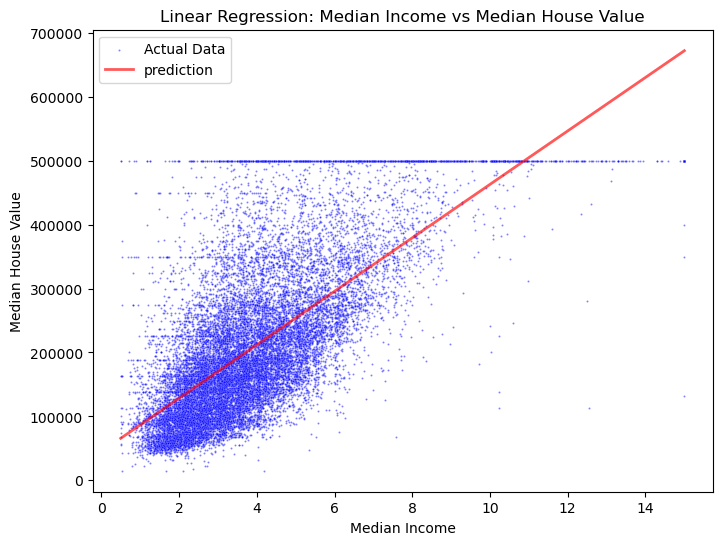

In [13]:
lr_model.fit(X_train, y_train)
y_pred_lr_model_val = lr_model.predict(X_val)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.flatten(), y=y, color='blue', alpha=0.5, label='Actual Data', s=2) 
sns.lineplot(x=np.linspace(X_val.min(), X_val.max(), 100), y=lr_model.predict(np.linspace(X_val.min(), X_val.max(), 100).reshape(-1, 1)), c="red", alpha= .65, lw=2, label="prediction")
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Median Income vs Median House Value')
plt.legend()
plt.show()

In [14]:
y_pred_lr_model_test = lr_model.predict(X_test)

val_rmse_lr_model_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_model_test))
print(f"LR RMSE on test set one feature : {val_rmse_lr_model_test}")

LR RMSE on test set one feature : 81293.12516007993


==============================================Lasso one feature====================================================

In [15]:
lasso = Lasso()
hyper_param = {'alpha': (0.0001, 0.001, 0.01, 1, 4, 10)}

lasso_reg = GridSearchCV(lasso, hyper_param, cv=9)
lasso_reg.fit(X_train, y_train)
print(lasso_reg.best_params_)

scores_lasso = cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
print('RMSE for each iteration:', -scores_lasso)
print('RMSE:', np.mean(-scores_lasso))

{'alpha': 0.0001}
RMSE for each iteration: [83804.99174696 83727.57875367 84396.42181314]
RMSE: 83976.33077125488


In [16]:
y_pred_lasso_val = lasso_reg.predict(X_val)
rmse_lasso_val = np.sqrt(mean_squared_error(y_val, y_pred_lasso_val))
print(f"Lasso RMSE on Validation Set: {rmse_lasso_val}")

y_pred_lasso_test = lasso_reg.predict(X_test)
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
print(f"Lasso RMSE on test Set: {rmse_lasso_test}")

Lasso RMSE on Validation Set: 85014.0431791214
Lasso RMSE on test Set: 81293.12516074933


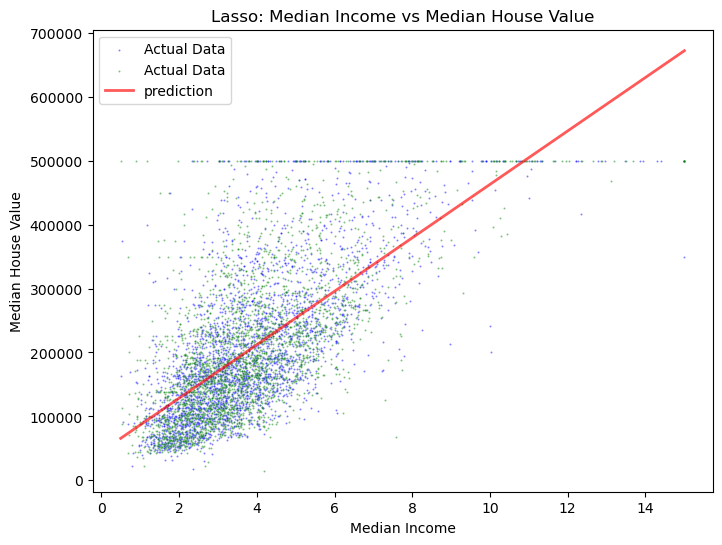

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, color='blue', alpha=0.5, label='Actual Data', s=2) 
sns.scatterplot(x=X_val.flatten(), y=y_val, color='green', alpha=0.5, label='Actual Data', s=2) 
sns.lineplot(x=np.linspace(X_test.min(), X_test.max(), 100), y=lr_model.predict(np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)), c="red", alpha= .65, lw=2, label="prediction")
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Lasso: Median Income vs Median House Value')
plt.legend()
plt.show()

==============================================Polynomial one feature====================================================

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pol_mod = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

pol_mod.fit(X_train, y_train)

pol_min = cross_val_score(pol_mod, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
y_pred = pol_mod.predict(X_test)
print(f"pol validation RMSE on Validation Set: {pol_min}")


pol validation RMSE on Validation Set: [-83417.19516545 -83465.28741454 -83964.3044445 ]


In [19]:
y_pred_pol_val = pol_mod.predict(X_val)
rmse_pol_val = np.sqrt(mean_squared_error(y_val, y_pred_pol_val))
print(f"Pol RMSE on Validation Set: {rmse_pol_val}")

y_pred_pol_test = pol_mod.predict(X_test)
rmse_pol_test = np.sqrt(mean_squared_error(y_test, y_pred_pol_test))
print(f"Pol RMSE on Validation Set: {rmse_pol_test}")

Pol RMSE on Validation Set: 84843.01923670282
Pol RMSE on Validation Set: 80726.79313200305


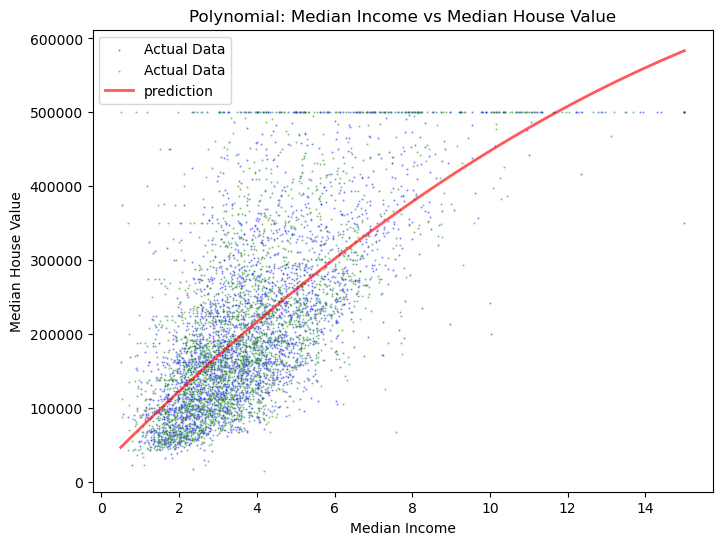

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, color='blue', alpha=0.5, label='Actual Data', s=2) 
sns.scatterplot(x=X_val.flatten(), y=y_val, color='green', alpha=0.5, label='Actual Data', s=2) 
sns.lineplot(x=np.linspace(X_test.min(), X_test.max(), 100), y=pol_mod.predict(np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)), c="red", alpha= .65, lw=2, label="prediction")
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial: Median Income vs Median House Value')
plt.legend()
plt.show()

==============================================Linear Regression two features====================================================

In [21]:
from sklearn.preprocessing import StandardScaler

X2 = housing[['total_rooms', 'median_income']]
y2 = housing['median_house_value']

X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_val_scaled = scaler.transform(X2_val)
X2_test_scaled = scaler.transform(X2_test)

lr_model2 = LinearRegression()
cross_val_scores2 = cross_val_score(lr_model2, X2_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_lr_cv2 = np.sqrt(-cross_val_scores2.mean())
print(f"two feature linear regression: {rmse_lr_cv2}")

two feature linear regression: 83980.4902845768


In [22]:
lr_model2.fit(X2_train, y2_train)

y_pred_lr_model2_val = lr_model2.predict(X2_val)
rmse_lr_model2_val = np.sqrt(mean_squared_error(y_val, y_pred_lr_model2_val))
print(f"lr model 2 RMSE on Validation Set: {rmse_lr_model2_val}")

y_pred_lr_model2_test = lr_model2.predict(X2_test)
rmse_lr_model2_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_model2_test))
print(f"lr model 2 RMSE on Validation Set: {rmse_lr_model2_test}")

lr model 2 RMSE on Validation Set: 85013.92764616638
lr model 2 RMSE on Validation Set: 81293.02135423104


==============================================Random forest regressor one features====================================================

In [23]:
forest = RandomForestRegressor()

param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 10]
}

forest_reg = GridSearchCV(forest, param_grid=param_grid, cv=5)

forest_reg.fit(X_train, y_train)

print(forest_reg.best_params_)

scores_forest = cross_val_score(forest_reg, X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
print('RMSE for each iteration:', -scores_forest)
print('Random forest RMSE on train Set:', np.mean(-scores_forest))

{'max_depth': 10, 'n_estimators': 120}
RMSE for each iteration: [84504.82195755 83259.79542552 84045.70615717]
Random forest RMSE on train Set: 83936.77451341227


In [24]:
y_pred_rfr_val = forest_reg.predict(X_val)
rmse_rfr_val = np.sqrt(mean_squared_error(y_val, y_pred_rfr_val))
print(f"Random forest RMSE on Validation Set: {rmse_rfr_val}")

y_pred_rfr_test = forest_reg.predict(X_test)
rmse_rfr_test = np.sqrt(mean_squared_error(y_test, y_pred_rfr_test))
print(f"Random forest RMSE on test Set: {rmse_rfr_test}")

Random forest RMSE on Validation Set: 85300.49722032038
Random forest RMSE on test Set: 81104.7435269688


==============================================Linear Regression three features====================================================

In [25]:
X3 = housing[['median_income', 'total_rooms', 'housing_median_age']]
y3 = housing['median_house_value']

X3_train, X3_temp, y3_train, y3_temp = train_test_split(X3, y3, test_size=0.3, random_state=42)
X3_val, X3_test, y3_val, y3_test = train_test_split(X3_temp, y3_temp, test_size=0.5, random_state=42)

lr_model3 = LinearRegression()
cross_val_scores3 = cross_val_score(lr_model3, X3_train, y3_train, scoring='neg_mean_squared_error', cv=5)
mean_cv_rmse3 = round( np.sqrt(-cross_val_scores3.mean()), 2)
print(f"lr model 3 RMSE on train Set = {mean_cv_rmse3}")

lr model 3 RMSE on train Set = 80688.19


In [26]:
lr_model3.fit(X3_train, y3_train)
y_pred_lr_model3 = lr_model3.predict(X3_val)
val_rmse_lr_model3 = np.sqrt(mean_squared_error(y3_val, y_pred_lr_model3))
print(f"lr model 3 RMSE on Validation Set: {val_rmse_lr_model3}")

lr model 3 RMSE on Validation Set: 81802.08192258634


In [27]:
y_pred_lr_model3_test = lr_model3.predict(X3_test)
val_rmse_lr_model3_test = np.sqrt(mean_squared_error(y3_test, y_pred_lr_model3_test))
print(f"lr model 3 RMSE on test Set: {val_rmse_lr_model3_test}")

lr model 3 RMSE on test Set: 78150.37909755854


==============================================Random forest regressor three features====================================================

In [28]:
forest3 = RandomForestRegressor()

param_grid3 = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10, 20]
}

forest_reg3 = GridSearchCV(forest3, param_grid=param_grid3, cv=5, n_jobs=-1)

forest_reg3.fit(X3_train, y3_train)

print(forest_reg.best_params_)

scores_forest3 = cross_val_score(forest_reg3, X3_train, y3_train, cv=3, scoring = 'neg_root_mean_squared_error')
print('Random forest 3 RMSE on train Set:', np.mean(-scores_forest3))

{'max_depth': 10, 'n_estimators': 120}
Random forest 3 RMSE on train Set: 76897.9221843435


In [29]:
y_pred_rfr3_val = forest_reg3.predict(X3_val)
val_rfr3_val = np.sqrt(mean_squared_error(y3_val, y_pred_rfr3_val))
print(f"Random forest 3 RMSE on validation Set: {val_rfr3_val}")

y_pred_rfr3_test = forest_reg3.predict(X3_test)
val_rfr3_test = np.sqrt(mean_squared_error(y3_test, y_pred_rfr3_test))
print(f"Random forest 3 RMSE on validation Set: {val_rfr3_test}")

Random forest 3 RMSE on validation Set: 78252.16515790805
Random forest 3 RMSE on validation Set: 74625.86350653882


In [30]:
new_data = housing.drop(columns=['total_bedrooms' ,'population' ,'households', 'longitude' ,'latitude'])
print (new_data)

# One-hot encoding for the 'view' column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
view_encoded = encoder.fit_transform(new_data[['ocean_proximity']]).toarray()
view_df = pd.DataFrame(view_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate encoded 'view' column back to the original dataframe
# df = pd.concat([df, view_df], axis=1).drop('ocean_proximity', axis=1)

print(new_data)

       housing_median_age  total_rooms  median_income  median_house_value  \
0                    41.0        880.0         8.3252            452600.0   
1                    21.0       7099.0         8.3014            358500.0   
2                    52.0       1467.0         7.2574            352100.0   
3                    52.0       1274.0         5.6431            341300.0   
4                    52.0       1627.0         3.8462            342200.0   
...                   ...          ...            ...                 ...   
20635                25.0       1665.0         1.5603             78100.0   
20636                18.0        697.0         2.5568             77100.0   
20637                17.0       2254.0         1.7000             92300.0   
20638                18.0       1860.0         1.8672             84700.0   
20639                16.0       2785.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2  